# Analise de dados da cidade de São Paulo

### Importação das bibliotecas de base para o projeto e o link para o Driver com o CSV

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#______________________________________________________________________________________#
# Link do CSV: https://drive.google.com/drive/folders/1Am0Qv2j1MrKyjwroYFFOR5yQ2zl6607x
#______________________________________________________________________________________#

### Leitura do CSV e amostra dos dados antes do tratamento

In [2]:
data = pd.read_csv('city_temperature.csv', low_memory=False)
data

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


### Seleção da cidade de São Paulo para analises, com remoção de valores nulos

In [3]:
brasil = data[(data['Country'] == 'Brazil')]
sp = brasil[(brasil['City'] == 'Sao Paulo')]
sp = sp.dropna(axis="columns", how="any")

### Função para a conversão de fahrenheit para celsius

In [4]:
def converter_termperatura(temp):
    temp = (temp - 32) * 5/9
    return float(temp)

### Fazendo a conversão de fahrenheit para celsius dentro de uma nova coluna e deletando a de fahrenheit

In [5]:
sp['Celsius'] = sp['AvgTemperature'].apply(converter_termperatura)
sp = sp.drop(columns=['AvgTemperature'])

### Tratamento da temperatura para maior precisão

In [12]:
sp['Celsius'] = sp['Celsius'].round(1)
sp

,Region,Country,City,Month,Day,Year,Celsius
1301306,South/Central America & Carribean,Brazil,Sao Paulo,1,1,1995,22.0
1301307,South/Central America & Carribean,Brazil,Sao Paulo,1,2,1995,23.0
1301308,South/Central America & Carribean,Brazil,Sao Paulo,1,3,1995,23.0
1301309,South/Central America & Carribean,Brazil,Sao Paulo,1,4,1995,23.0
1301310,South/Central America & Carribean,Brazil,Sao Paulo,1,5,1995,24.0
...,...,...,...,...,...,...,...
1310567,South/Central America & Carribean,Brazil,Sao Paulo,5,9,2020,16.0
1310568,South/Central America & Carribean,Brazil,Sao Paulo,5,10,2020,18.0
1310569,South/Central America & Carribean,Brazil,Sao Paulo,5,11,2020,19.0
1310570,South/Central America & Carribean,Brazil,Sao Paulo,5,12,2020,19.0


### Juntando as coluas ano/mês/dia em uma nova coluna chamada Date

In [13]:
cols=["Year","Month","Day"]
sp['Date'] = sp[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

### Escolhendo as temperaturas de acordo com a cidade de São Paulo

In [14]:
sp = sp[sp['Celsius'] < 50]
sp = sp[sp['Celsius'] > 0]

### Convertendo a coluna Date em série temporal na nova coluna ds

In [15]:
sp['ds'] = pd.to_datetime(sp['Date'])

### Deletando a coluna Date

In [16]:
sp = sp.drop('Date', axis = 1)

### Exibindo os dados com a nova coluna ds

In [17]:
sp

,Region,Country,City,Month,Day,Year,Celsius,ds
1301306,South/Central America & Carribean,Brazil,Sao Paulo,1,1,1995,22.0,1995-01-01
1301307,South/Central America & Carribean,Brazil,Sao Paulo,1,2,1995,23.0,1995-01-02
1301308,South/Central America & Carribean,Brazil,Sao Paulo,1,3,1995,23.0,1995-01-03
1301309,South/Central America & Carribean,Brazil,Sao Paulo,1,4,1995,23.0,1995-01-04
1301310,South/Central America & Carribean,Brazil,Sao Paulo,1,5,1995,24.0,1995-01-05
...,...,...,...,...,...,...,...,...
1310567,South/Central America & Carribean,Brazil,Sao Paulo,5,9,2020,16.0,2020-05-09
1310568,South/Central America & Carribean,Brazil,Sao Paulo,5,10,2020,18.0,2020-05-10
1310569,South/Central America & Carribean,Brazil,Sao Paulo,5,11,2020,19.0,2020-05-11
1310570,South/Central America & Carribean,Brazil,Sao Paulo,5,12,2020,19.0,2020-05-12


### Exibindo valores: minima, maxima, media e mediana da cidade de São Paulo

In [18]:
print(sp.groupby('City').Celsius.agg(['min','max','mean','median']))

           min   max       mean  median
City                                   
Sao Paulo  7.0  32.0  20.280576    20.0


### Informação detalhada dos dados de São Paulo

In [19]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9174 entries, 1301306 to 1310571
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Region   9174 non-null   object        
 1   Country  9174 non-null   object        
 2   City     9174 non-null   object        
 3   Month    9174 non-null   int64         
 4   Day      9174 non-null   int64         
 5   Year     9174 non-null   int64         
 6   Celsius  9174 non-null   float64       
 7   ds       9174 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 903.1+ KB


### Descrição dos dados de São Paulo

In [20]:
sp.describe()

,Month,Day,Year,Celsius
count,9174.000000,9174.000000,9174.000000,9174.000000
mean,6.450948,15.709505,2007.235448,20.280576
std,3.450502,8.801088,7.306137,3.504273
min,1.000000,1.000000,1995.000000,7.000000
25%,3.000000,8.000000,2001.000000,18.000000
50%,6.000000,16.000000,2007.000000,20.000000
75%,9.000000,23.000000,2014.000000,23.000000
max,12.000000,31.000000,2020.000000,32.000000


### Tamanho da base de dados de São Paulo

In [21]:
sp.size

73392

### Quantidade de memória utilizada

In [22]:
sp.memory_usage()

Index      337624
Region      73392
Country     73392
City        73392
Month       73392
Day         73392
Year        73392
Celsius     73392
ds          73392
dtype: int64

## Fazendo a amostra do dado com uma série temporal

Text(0, 0.5, 'Temperatura')

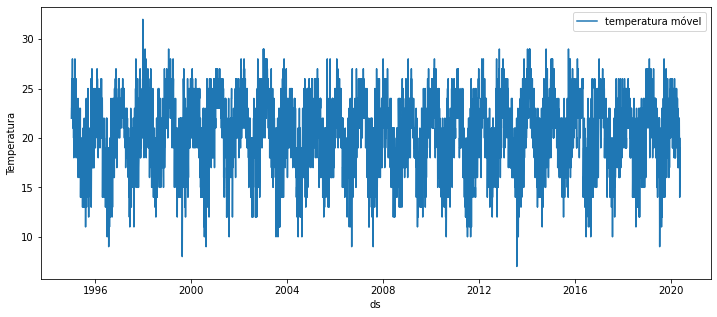

In [23]:
plt.figure( figsize = ( 12, 5)) 
sns.lineplot( x = 'ds', 
             y = 'Celsius', 
             data = sp, 
             label = 'temperatura nos últimos anos')

plt.ylabel('Temperatura') 
#sns.relplot(data = sp, x = 'ds', y = 'Celsius', label = 'São Paulo',kind="line",height=5, aspect=2.5 )

## Colocando os dados processados dentro de um novo csv

In [24]:
sp.to_csv('SP.csv', encoding='utf-8')